In [2]:
import torch
from torch.utils.data import Dataset
import json
import numpy as np
import torch.nn as nn
import numpy as np
import torch.optim as optim
from torch.autograd import Variable
from math import sqrt
from time import time
import argparse

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

In [7]:
!dir

flow.zip  NYC\ 2017-07-01\ to\ 2017-07-31.csv  path.zip  poi.zip  sample_data


In [8]:
!unzip flow.zip
!unzip path.zip
!unzip poi.zip

Archive:  flow.zip
  inflating: flow/flow_bike_nyc_irregular.json  
  inflating: flow/flow_bike_nyc_regular.json  
Archive:  path.zip
  inflating: path/irregular_path.npy  
  inflating: path/regular_path.npy   
Archive:  poi.zip
  inflating: poi/irregular_feature.npy  
  inflating: poi/irregular_idx.npy   
  inflating: poi/irregular_label.npy  
  inflating: poi/irregular_weight.npy  
  inflating: poi/regular_feature.npy  
  inflating: poi/regular_idx.npy     
  inflating: poi/regular_label.npy   
  inflating: poi/regular_weight.npy  


In [9]:
raw_data = json.load(open("flow/flow_bike_nyc_irregular.json"))

In [10]:
print(raw_data.keys())

dict_keys(['inflow', 'outflow'])


In [11]:
data1 = raw_data['inflow']
data2 = raw_data['outflow']

In [ ]:
print(data1.keys())

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81'])


In [ ]:
print(len(data1['10']))

2208


In [97]:
start_date = '2017-07-01'
end_date = '2017-10-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='1H')[:-1]

## Region wise density

In [ ]:
data1['0'][50]

4.0

In [ ]:
specific_index = 154
specific_values = [data1[str(key)][specific_index] for key in range(0, 82)]
specific_values2 = [data2[str(key)][specific_index] for key in range(0, 82)]
#print(specific_values)

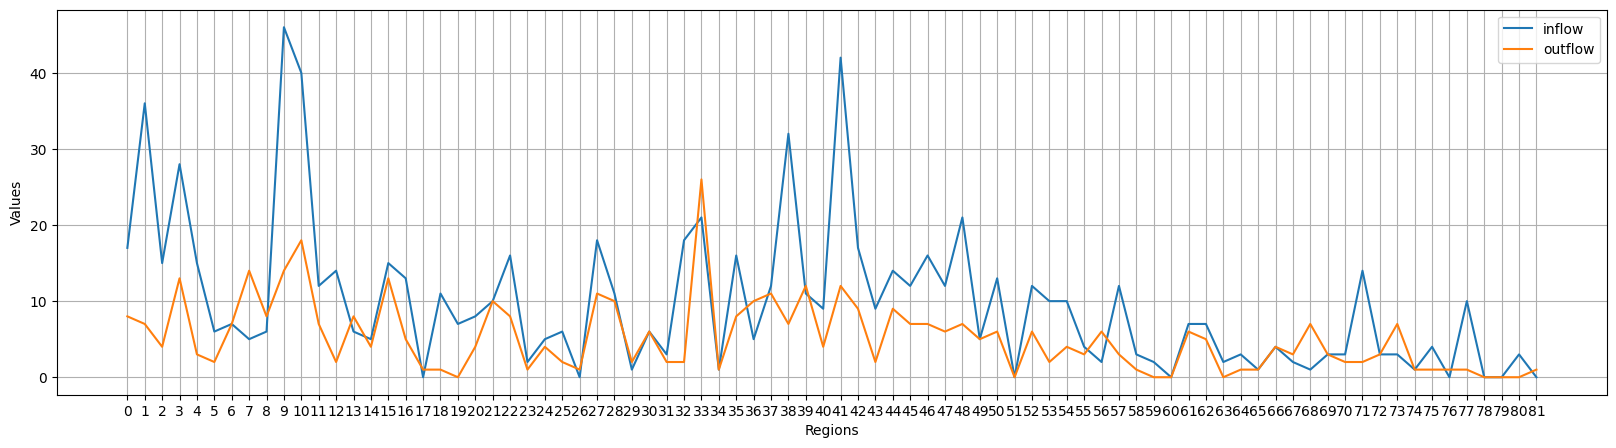

In [ ]:
keys = list(data1.keys())
values = list(data1.values())
values2 = list(data2.values())

# Plot the data
plt.figure(figsize=(20, 5))
plt.plot(keys, specific_values, label ='inflow')
plt.plot(keys, specific_values2, label ='outflow')
#plt.title('Dictionary Values Plot')
plt.xlabel('Regions')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

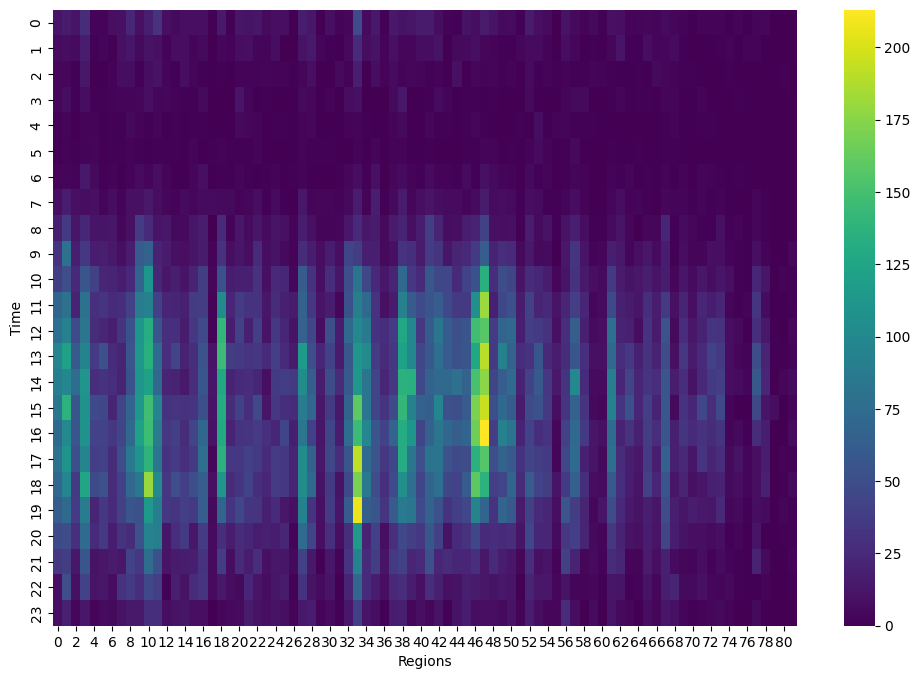

In [163]:
start_index = 1560  # Start index for time range (inclusive)
end_index = 1584   # End index for time range (exclusive)
# Convert the dictionary values into a 2D array (list of lists)
heatmap_data = np.array([data1[str(key)][start_index:end_index] for key in range(0, 82)])
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, cmap='viridis', cbar=True)

# Set the labels
#plt.title('Heatmap of Intensity Values Over Time')
plt.xlabel('Regions')
plt.ylabel('Time')


plt.show()

0.0 145.0


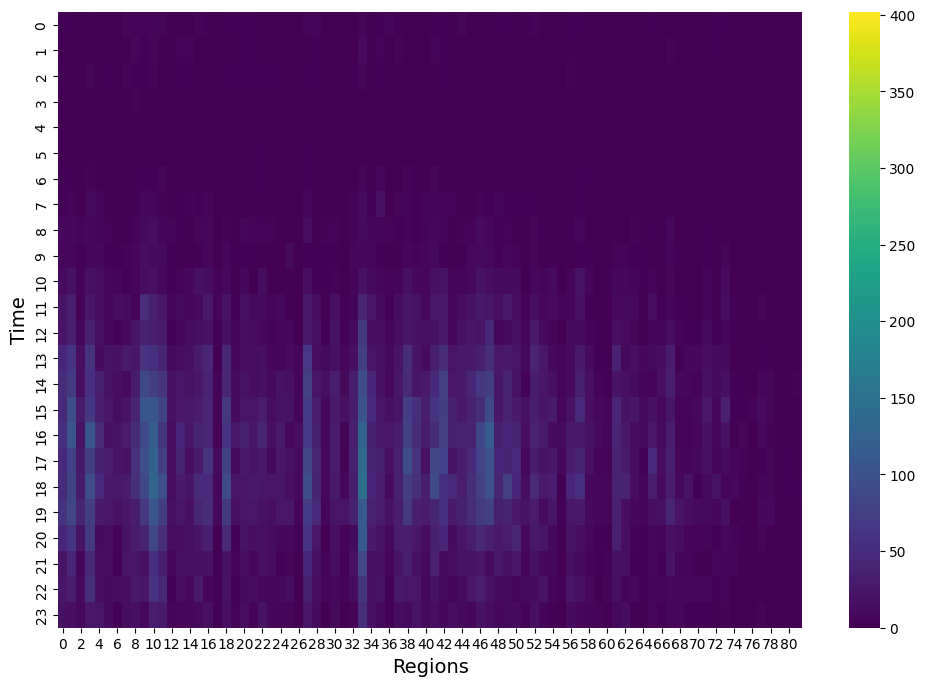

In [16]:
start_index = 1536  # Start index for time range (inclusive)
end_index =  1560  # End index for time range (exclusive)
# Convert the dictionary values into a 2D array (list of lists)
heatmap_data = np.array([data1[str(key)][start_index:end_index] for key in range(0, 82)])
# Create the
# Find the global minimum and maximum for both heatmaps
global_min = heatmap_data.min()
global_max = heatmap_data.max()
print(global_min, global_max)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, cmap='viridis', cbar=True, vmin=0.0, vmax=402.0)

# Set the labels
#plt.title('Heatmap of Intensity Values Over Time')
plt.xlabel('Regions', fontsize = 14)
plt.ylabel('Time', fontsize = 14)
plt.savefig('heatmap_mincrowd_weekend.pdf', format='pdf', bbox_inches='tight', pad_inches=0)

plt.show()

# Region analysis 24 hours

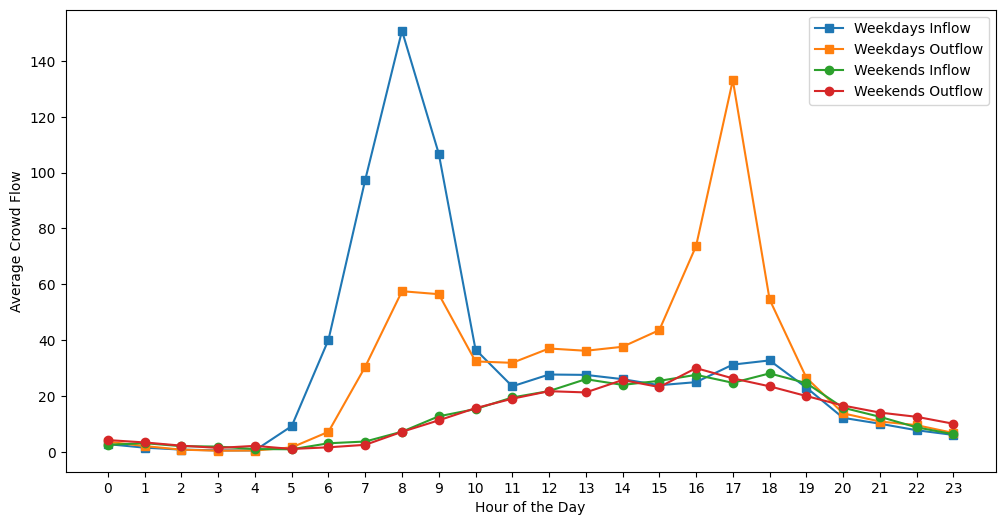

In [ ]:
# Combine the date range with the corresponding sublist data into a DataFrame
df = pd.DataFrame({'datetime': date_range, 'sublist1': key_value1, 'sublist2': key_value2})

# Extract the day of the week (0: Monday, 6: Sunday)
df['day_of_week'] = df['datetime'].dt.dayofweek

# Group the data by day of the week and hour of the day, calculate the average
avg_weekday = df[df['day_of_week'] < 5].groupby(df['datetime'].dt.hour).mean()
avg_weekend = df[df['day_of_week'] >= 5].groupby(df['datetime'].dt.hour).mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_weekday.index, avg_weekday['sublist1'], label='Weekdays Inflow', marker='s')
plt.plot(avg_weekday.index, avg_weekday['sublist2'], label='Weekdays Outflow', marker='s')
plt.plot(avg_weekend.index, avg_weekend['sublist1'], label='Weekends Inflow', marker='o')
plt.plot(avg_weekend.index, avg_weekend['sublist2'], label='Weekends Outflow', marker='o')
# Customize the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Average Crowd Flow")
#plt.title("24-Hour Average Crowd Flow (Weekdays vs Weekends) for region # 82")
plt.legend()
plt.xticks(range(24))
# Display the
#plt.savefig('region62-hour.pdf',  bbox_inches='tight', pad_inches=0)
plt.show()


# Region Analsis Week-Wise

<ipython-input-17-6770ff77e4dc>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_by_dayofweek = df.groupby('day_of_week').mean()


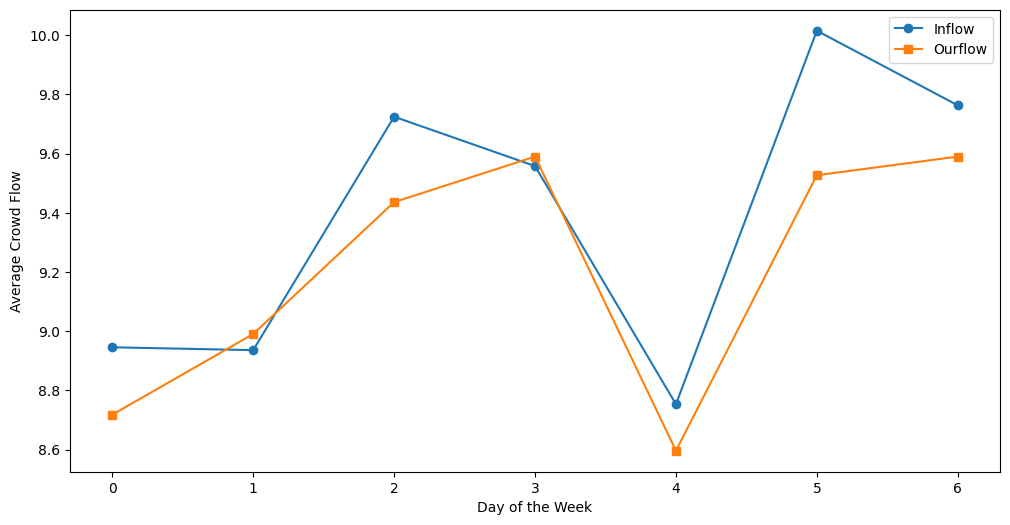

In [ ]:
# Combine the date range with the corresponding sublist data into a DataFrame
df = pd.DataFrame({'datetime': date_range, 'sublist1': key_value1, 'sublist2': key_value2})

df['day_of_week'] = df['datetime'].dt.dayofweek

#print (df.head(26))
# Group the data by day of the week and calculate the average
avg_by_dayofweek = df.groupby('day_of_week').mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_by_dayofweek.index, avg_by_dayofweek['sublist1'], label='Inflow', marker='o')
plt.plot(avg_by_dayofweek.index, avg_by_dayofweek['sublist2'], label='Ourflow', marker='s')
# Customize the plot
plt.xlabel("Day of the Week")
plt.ylabel("Average Crowd Flow")
#plt.title("Average Crowd Flow by Day of the Week")
plt.legend()
plt.savefig('region100-dayofweek.pdf',  bbox_inches='tight', pad_inches=0)
plt.show()

# Crowd density plot

In [ ]:
# Combine the date range with the corresponding sublist data into a DataFrame
df = pd.DataFrame({'datetime': date_range, 'sublist1': key_value1, 'sublist2': key_value2})

In [ ]:
df['density'] = df['sublist1'] - df['sublist2']
#print(df.head(10))

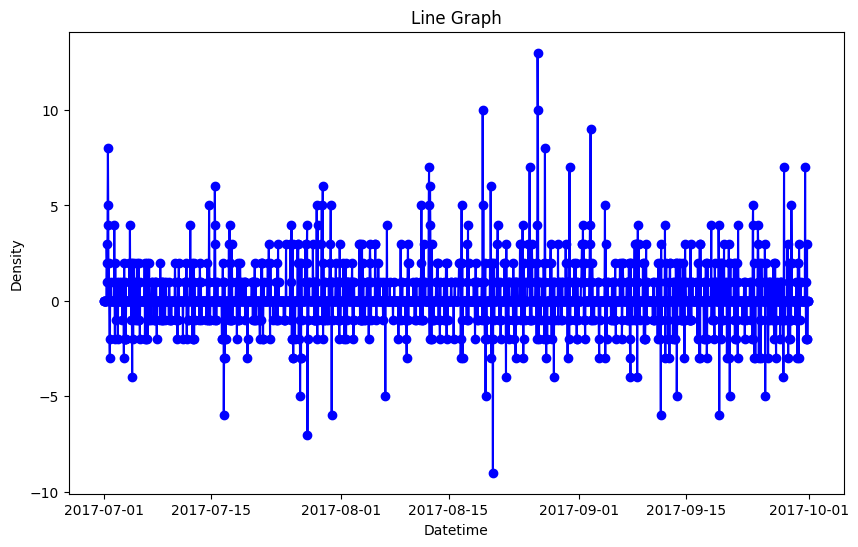

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['density'], marker='o', linestyle='-', color='blue')

# Customize the plot
plt.title("Line Graph")
plt.xlabel("Datetime")
plt.ylabel("Density")

# Display the plot
plt.show()

In [ ]:
count = (df['density'] == 0).sum()
print(count)

1285


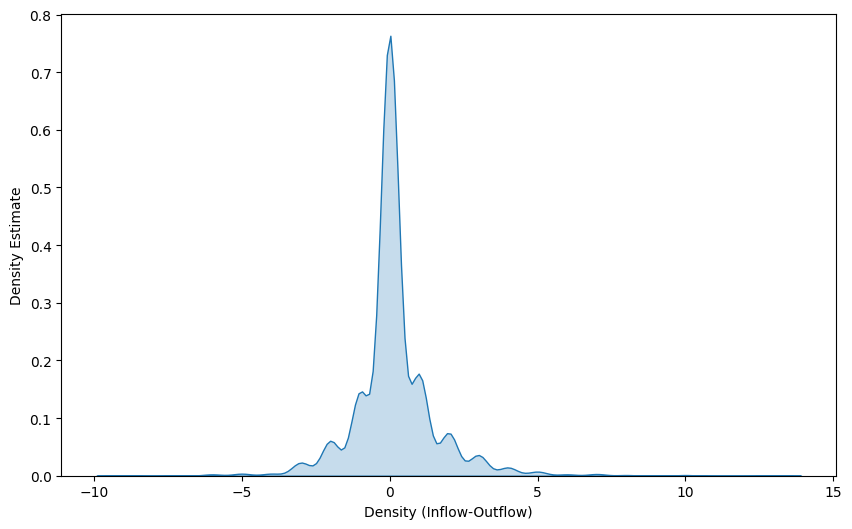

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['density'], fill=True)

# Customize the plot
#plt.title("Density Graph")
plt.xlabel("Density (Inflow-Outflow)")
plt.ylabel("Density Estimate")
#plt.savefig('density-120.pdf',  bbox_inches='tight', pad_inches=0)
# Display the plot
plt.show()

# Basic inflow outflow

<ipython-input-17-f0e877ab1d10>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_average = df.groupby(df['datetime'].dt.date).mean()


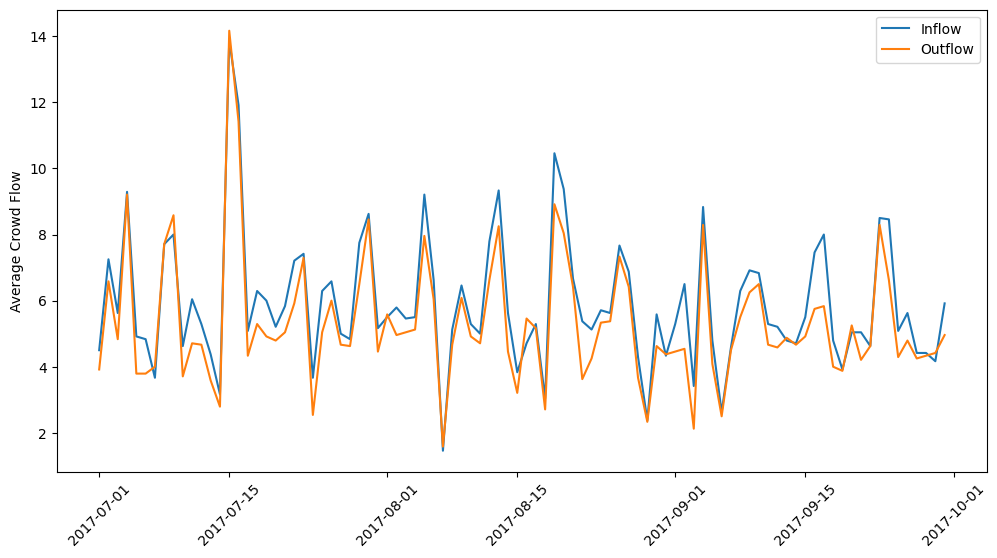

In [ ]:
# Combine the date range with the corresponding sublist data into a DataFrame
df = pd.DataFrame({'datetime': date_range, 'sublist1': key_value1, 'sublist2': key_value2})

df['datetime'] = pd.to_datetime(df['datetime'])

# Calculate the daily average crowd flow by grouping the data by date
daily_average = df.groupby(df['datetime'].dt.date).mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_average.index, daily_average['sublist1'], label='Inflow')
plt.plot(daily_average.index, daily_average['sublist2'], label='Outflow')
# Customize the plot
#plt.xlabel("Date")
plt.ylabel("Average Crowd Flow")
#plt.title("Daily Average Crowd Flow")

plt.legend()
plt.xticks(rotation=45)
#plt.savefig('region68-dailyavg.pdf',  bbox_inches='tight', pad_inches=0)
# Display the plot
plt.show()

In [ ]:
daily_average = df.groupby(df['datetime'].dt.date)

In [ ]:
print(daily_average.head())

                datetime  sublist1  sublist2
0    2017-07-01 00:00:00       0.0       0.0
1    2017-07-01 01:00:00       2.0       0.0
2    2017-07-01 02:00:00       1.0       0.0
3    2017-07-01 03:00:00       2.0       0.0
4    2017-07-01 04:00:00       0.0       0.0
...                  ...       ...       ...
2184 2017-09-30 00:00:00       5.0       3.0
2185 2017-09-30 01:00:00       2.0       0.0
2186 2017-09-30 02:00:00       0.0       0.0
2187 2017-09-30 03:00:00       0.0       1.0
2188 2017-09-30 04:00:00       0.0       0.0

[460 rows x 3 columns]


In [ ]:
print(df)

                datetime  sublist1  sublist2
0    2017-07-01 00:00:00       0.0       0.0
1    2017-07-01 01:00:00       2.0       0.0
2    2017-07-01 02:00:00       1.0       0.0
3    2017-07-01 03:00:00       2.0       0.0
4    2017-07-01 04:00:00       0.0       0.0
...                  ...       ...       ...
2203 2017-09-30 19:00:00       5.0       5.0
2204 2017-09-30 20:00:00       2.0       4.0
2205 2017-09-30 21:00:00       4.0       2.0
2206 2017-09-30 22:00:00       5.0       0.0
2207 2017-09-30 23:00:00       2.0       2.0

[2208 rows x 3 columns]


In [ ]:
temp=df.iloc[288:456]


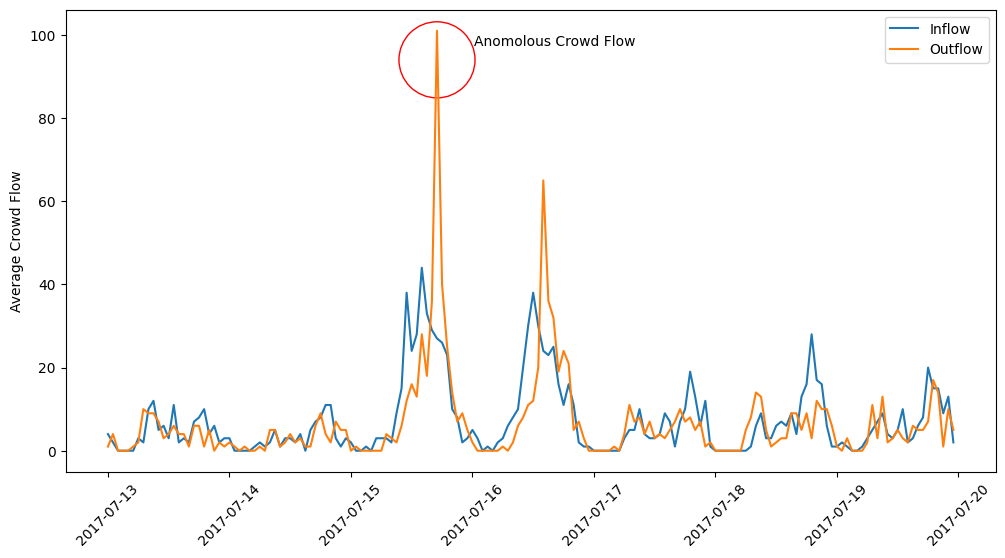

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(temp['datetime'],temp['sublist1'], label='Inflow')
plt.plot(temp['datetime'], temp['sublist2'], label='Outflow')
# Customize the plot
#plt.xlabel("Date")
plt.ylabel("Average Crowd Flow")
#plt.title("Daily Average Crowd Flow")
# Add an annotated circle at a specific position

position_index = 353  # Index of the position in the data
position_datetime = temp['datetime'][position_index]
value = temp['sublist1'][position_index]+ 67

plt.scatter(position_datetime, value, s=3000, facecolor='none', edgecolor='red')
plt.annotate('Anomolous Crowd Flow', (position_datetime, value),
             xytext=(27, 10), textcoords='offset points')

#plt.scatter(position_datetime, value1, s=200, facecolor='none', edgecolor='green', label='Annotated Point')


plt.legend()
plt.xticks(rotation=45)
plt.savefig('region112-annotate.pdf',  bbox_inches='tight', pad_inches=0)
# Display the plot
plt.show()

# POI Study

In [68]:
feature = np.load('poi/' + 'irregular' + '_feature.npy').astype(np.float32)

In [69]:
print(feature.shape)

(82, 10)


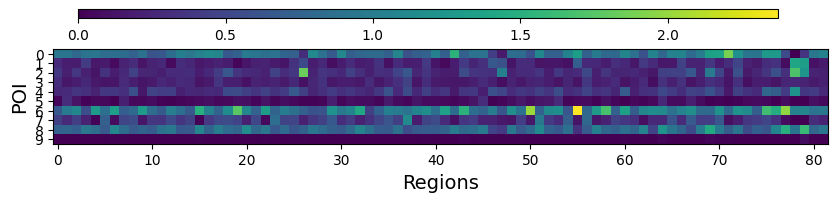

In [111]:
# Slice the density array to select a range of values
subset_density_array = feature[0:82, :]

axs = plt.figure(figsize=(10, 3))
transposed_density_array = np.transpose(subset_density_array)
# Create a heatmap using imshow()
heatmap = plt.imshow(transposed_density_array, cmap='viridis', interpolation='nearest')

# Add a colorbar for reference
#plt.colorbar()
# Customize the plot
#plt.title("Density Heatmap")
plt.xlabel("Regions", fontsize = 14)
plt.ylabel("POI", fontsize = 14)
plt.yticks(range(10))
cbar_ax = plt.gcf().add_axes([0.15, 0.6, 0.7, 0.03])  # [left, bottom, width, height]
plt.subplots_adjust(bottom=-0.2)
# Add the colorbar to the custom axis
plt.colorbar( heatmap, cax=cbar_ax, orientation='horizontal')


plt.savefig('POI-region-heatmap2.pdf',  bbox_inches='tight', pad_inches=0)
# Display the plot
plt.show()

# Weather and CrowdFlow

In [12]:
weather_df = pd.read_csv(r'/content/NYC 2017-07-01 to 2017-07-31.csv')
print(weather_df.shape)

(744, 24)


In [ ]:
print(weather_df.columns)

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')


In [ ]:
print(df.head())

             datetime  sublist1  sublist2
0 2017-07-01 00:00:00       2.0       1.0
1 2017-07-01 01:00:00       0.0       2.0
2 2017-07-01 02:00:00       2.0       3.0
3 2017-07-01 03:00:00       1.0       0.0
4 2017-07-01 04:00:00       0.0       0.0


In [ ]:
orginal_df = df.iloc[0:744,:]

In [ ]:
print(orginal_df.shape)

(744, 3)


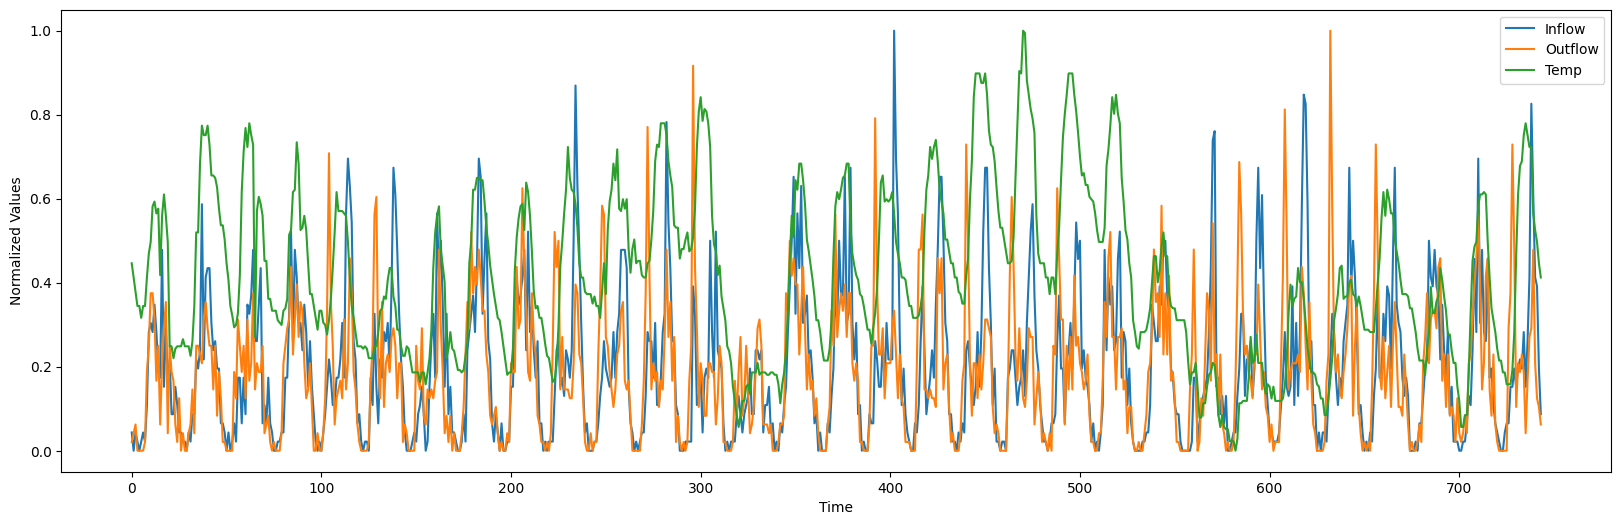

In [ ]:
# Select specific columns for plotting
column1 = 1  # Index of column in df1
column2 = 2  # Index of column in df2
column3 = 2

# Normalize the values using min-max normalization
normalized_column1 = (orginal_df.iloc[:, column1] - orginal_df.iloc[:, column1].min()) / (orginal_df.iloc[:, column1].max() - orginal_df.iloc[:, column1].min())
normalized_column3 = (orginal_df.iloc[:, column3] - orginal_df.iloc[:, column3].min()) / (orginal_df.iloc[:, column3].max() - orginal_df.iloc[:, column3].min())
normalized_column2 = (weather_df.iloc[:, column2] - weather_df.iloc[:, column2].min()) / (weather_df.iloc[:, column2].max() - weather_df.iloc[:, column2].min())

plt.figure(figsize=(20, 6))
# Create the line plot with normalized values
plt.plot(normalized_column1, label='Inflow')
plt.plot(normalized_column3, label='Outflow')
plt.plot(normalized_column2, label='Temp')

# Customize the plot
#plt.title('Relationship between DataFrame 1 and DataFrame 2')
plt.xlabel('Time')
plt.ylabel('Normalized Values')

# Display the plot
plt.legend()
#plt.savefig('crowflow-weather.pdf',  bbox_inches='tight', pad_inches=0)
plt.show()


# Weather Plot

In [16]:
weather_df1 = pd.read_csv(r'/content/NYC 2017-07-01 to 2017-07-31.csv')
weather_df2 = pd.read_csv(r'/content/NYC 2017-08-01 to 2017-08-31 (1).csv')
weather_df3 = pd.read_csv(r'/content/NYC 2017-09-01 to 2017-09-30.csv')

In [17]:
weather_final = pd.concat([weather_df1, weather_df2, weather_df3], axis=0)

In [52]:
weather_final = weather_final.reset_index()

In [53]:
weather_final.tail(5)

,index,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
2203,715,NYC,2017-09-30T19:00:00,16.3,16.3,11.8,74.41,0.0,0,NaN,...,1025.4,87.1,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
2204,716,NYC,2017-09-30T20:00:00,14.9,14.9,10.4,74.87,0.0,0,NaN,...,1026.1,51.7,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
2205,717,NYC,2017-09-30T21:00:00,14.9,14.9,10.9,77.03,0.0,0,NaN,...,1026.4,62.7,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
2206,718,NYC,2017-09-30T22:00:00,14.2,14.2,9.9,75.51,0.0,0,NaN,...,1027.2,88.8,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
2207,719,NYC,2017-09-30T23:00:00,14.9,14.9,10.4,74.85,0.0,0,NaN,...,1027.4,69.6,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"


In [20]:
# Initialize a list to store the sums
sums = [0] * 2208

# Iterate over each key and value in the dictionary
for values in data1.values():
    # Add each element to the corresponding position in the sum list
    for i in range(2208):
        sums[i] += values[i]

# Print the resultant sums list
print(len(sums))

2208


In [22]:
# Initialize a list to store the sums
sums2 = [0] * 2208

# Iterate over each key and value in the dictionary
for values in data2.values():
    # Add each element to the corresponding position in the sum list
    for i in range(2208):
        sums2[i] += values[i]

# Print the resultant sums list
print(len(sums2))

2208


In [23]:
inflow_df = pd.DataFrame(sums, columns=['inflow'])

print(inflow_df)

      inflow
0      401.0
1      380.0
2      200.0
3      138.0
4       92.0
...      ...
2203  2239.0
2204  1573.0
2205  1191.0
2206   986.0
2207   871.0

[2208 rows x 1 columns]


In [24]:
outflow_df = pd.DataFrame(sums2, columns=['outflow'])

print(outflow_df)

      outflow
0       509.0
1       336.0
2       177.0
3       127.0
4        78.0
...       ...
2203   2050.0
2204   1427.0
2205   1155.0
2206    951.0
2207    663.0

[2208 rows x 1 columns]


In [29]:
flow_df = pd.concat([inflow_df, outflow_df], axis=1)

In [31]:
flow_df['crowdflow'] = flow_df['inflow'] + flow_df['outflow']

print(flow_df)

      inflow  outflow  crowdflow
0      401.0    509.0      910.0
1      380.0    336.0      716.0
2      200.0    177.0      377.0
3      138.0    127.0      265.0
4       92.0     78.0      170.0
...      ...      ...        ...
2203  2239.0   2050.0     4289.0
2204  1573.0   1427.0     3000.0
2205  1191.0   1155.0     2346.0
2206   986.0    951.0     1937.0
2207   871.0    663.0     1534.0

[2208 rows x 3 columns]


In [57]:
total_flow = pd.concat([flow_df, weather_final], axis=1)

,inflow,outflow,crowdflow,index,name,datetime,temp,feelslike,dew,humidity,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,401.0,509.0,910.0,0,NYC,2017-07-01T00:00:00,25.7,25.7,20.0,70.59,...,1015.1,35.4,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
1,380.0,336.0,716.0,1,NYC,2017-07-01T01:00:00,25.1,25.1,20.5,75.82,...,1015.1,1.9,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
2,200.0,177.0,377.0,2,NYC,2017-07-01T02:00:00,24.5,24.5,20.6,79.12,...,1014.8,27.8,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
3,138.0,127.0,265.0,3,NYC,2017-07-01T03:00:00,23.9,23.9,20.6,81.50,...,1014.5,27.8,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
4,92.0,78.0,170.0,4,NYC,2017-07-01T04:00:00,23.9,23.9,20.0,79.16,...,1014.1,0.6,16.0,0.0,0.0,0,NaN,Clear,clear-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2239.0,2050.0,4289.0,715,NYC,2017-09-30T19:00:00,16.3,16.3,11.8,74.41,...,1025.4,87.1,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
2204,1573.0,1427.0,3000.0,716,NYC,2017-09-30T20:00:00,14.9,14.9,10.4,74.87,...,1026.1,51.7,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
2205,1191.0,1155.0,2346.0,717,NYC,2017-09-30T21:00:00,14.9,14.9,10.9,77.03,...,1026.4,62.7,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"
2206,986.0,951.0,1937.0,718,NYC,2017-09-30T22:00:00,14.2,14.2,9.9,75.51,...,1027.2,88.8,16.0,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KNYC,72503014732"


In [75]:
result2 = total_flow.groupby('icon')['crowdflow'].agg(['sum', 'count'])
result2['sum/count1'] = result2['sum'] / result2['count']

In [76]:
result2

,sum,count,sum/count1
icon,,,
clear-day,3958252.0,623,6353.534510
clear-night,893428.0,569,1570.172232
cloudy,609086.0,192,3172.322917
partly-cloudy-day,2064027.0,323,6390.176471
partly-cloudy-night,314948.0,204,1543.862745
rain,1418553.0,297,4776.272727


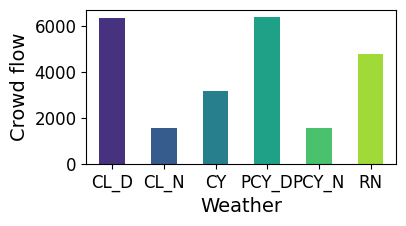

In [93]:
# @title sum

from matplotlib import pyplot as plt
ax = result2['sum/count1'].plot(kind='bar', figsize=(4, 2), color=sns.color_palette("viridis", len(result2)))
#plt.gca().spines[['top', 'right']].set_visible(True)
new_labels = ['CL_D', 'CL_N', 'CY', 'PCY_D', 'PCY_N', 'RN']
ax.set_xticks(range(len(new_labels)))
ax.set_xticklabels(new_labels, rotation = 0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Weather', fontsize=14)
plt.ylabel('Crowd flow', fontsize=14)
plt.savefig('crowflow_weather.pdf',  bbox_inches='tight', pad_inches=0)
plt.show()